In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DATA COLLECTION & PROCESSING

In [5]:
titanic_data=pd.read_csv(r"F:\Afame\Titanic-Dataset.csv")

In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.shape

(891, 12)

In [12]:
#number of missing values in columns
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#DROPING CABIN COLUMN FROM THE DATAFRAME TO GET ACCURATE PREDICTION
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [17]:
#REPLACING MISSING VALUES IN AGE COLUMN WITH MEAN VALUE
titanic_data['Age'].fillna(titanic_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
#FINDING MODE VALUE OF EMBARKED COLUMN
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [25]:
#REPLACING MISSING VALUES IN EMBARKED COLUMN WITH MODE VALUE
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [27]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [29]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
#FINDING THE NO.OF PEOPLE SURVIVED AND NOT SURVIVED
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

DATA VISUALIZATION

<Axes: xlabel='Survived', ylabel='count'>

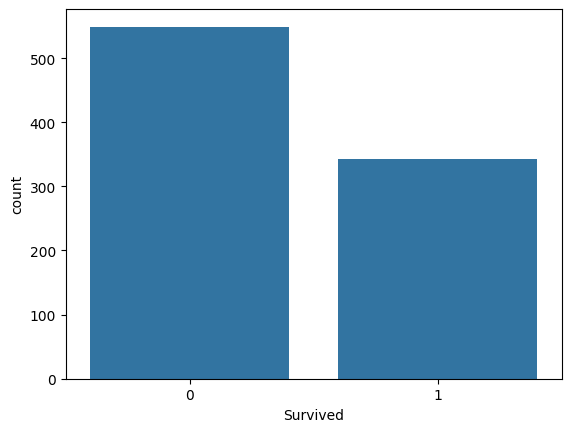

In [35]:
#COUNTPLOT FOR SURVIVED COLUMN
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

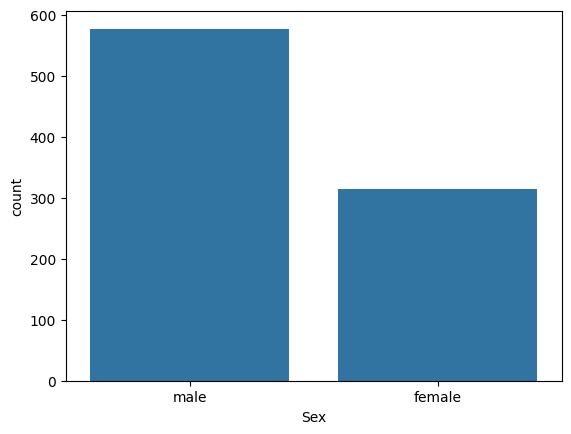

In [38]:
sns.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

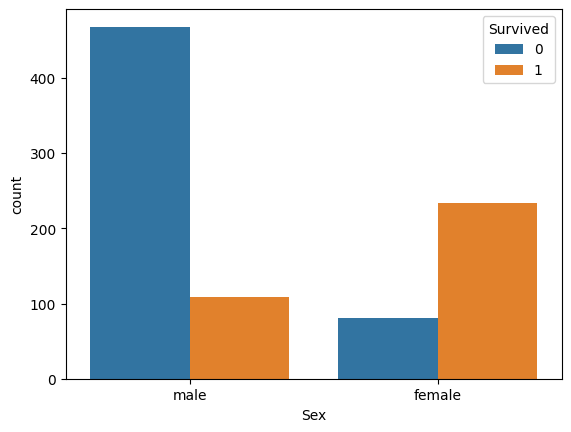

In [40]:
#NO.OF SURVIVERS FROM GENGER WISE
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

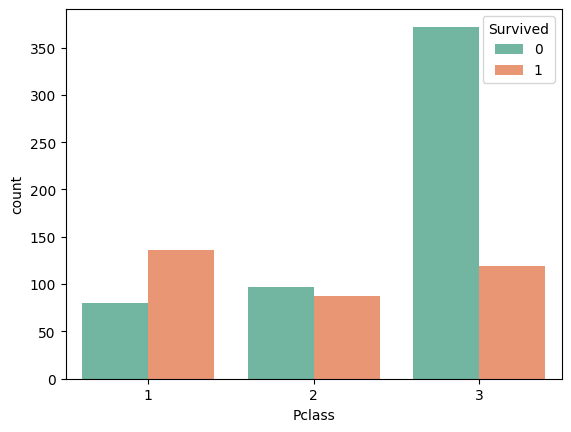

In [51]:
#COUNTPLOT FOR PCLASS WISE
sns.countplot(x='Pclass',hue='Survived',data=titanic_data,palette='Set2')

ENCODING THE CATEGORICAL COLUMN

In [53]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [56]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [59]:
#CONVERTING CATEGORICAL COLUMNS
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


SEPERATING FEATURES AND TARGETS

In [62]:
x=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_data['Survived']

In [64]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [66]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


SPILITTING DATA INTO TRAINING DATA & TEST DATA

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [72]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


MODEL TRAINING

LOGISTIC REGRESSION

In [74]:
model=LogisticRegression()

In [76]:
#TRAINING THE LOGISTIC REGRESSION MODEL WITH TRAINING DATA
model.fit(x_train,y_train)

C:\Users\prithiv\Downloads\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUATION FOR ACCURACY SCORE

In [78]:
#ACCURACY ON TRAINING DATA
x_train_prediction=model.predict(x_train)

In [80]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [82]:
traning_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("ACCURACY SCORE OF TRAINING DATA:",traning_data_accuracy)

ACCURACY SCORE OF TRAINING DATA: 0.8075842696629213


In [87]:
#ACCURACY ON TEST DATA
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [86]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("ACCURACY SCORE OF TEST DATA:",test_data_accuracy)

ACCURACY SCORE OF TEST DATA: 0.7821229050279329
